<a href="https://colab.research.google.com/github/prophets-of-eternity/summer-2021-v3/blob/main/ACM_PP_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
except:
    print("Note Google CoLab")
    COLAB = False



Mounted at /content/drive
Note: using Google CoLab


In [ ]:
!pip install pytz
!pip install https://github.com/neuropsychology/neurokit/zipball/master

     / 155.9 MB 41.4 MB/s
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for neurokit2: filename=neurokit2-0.1.3-py2.py3-none-any.whl size=1010309 sha256=9940225695facc01ccb1bfcc9b517282263a6e6c222f1df9bf84852d3275dba8
  Stored in directory: /tmp/pip-ephem-wheel-cache-p4o8l77k/wheels/f9/ab/f2/fd4a1736f76af31efe92b48862a9b15d383fd35cebc6010ed5
Successfully built neurokit2


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import pytz
import os
import matplotlib.pyplot as plt
import neurokit2 as nk
from scipy import signal
import csv

In [ ]:
def condition(value):
    if value <= 13:
        return 0 #minimal
    elif (value>=14) and (value<=19):
        return 1 #mild
    elif (value>=20) and (value<=28):
        return 2 #moderate
    elif value >= 29:
        return 3 #severe


def timeconversion(value):
  # print(pytz.all_timezones)
  tz = pytz.timezone('Asia/Shanghai')
  return datetime.fromtimestamp(value/1000, tz=tz).strftime('%Y-%m-%d %H:%M:%S')

def endtime(value):
  # print(pytz.all_timezones)
  tz = pytz.timezone('Asia/Shanghai')
  return datetime.fromtimestamp((value-1.8e+6)/1000, tz=tz).strftime('%Y-%m-%d %H:%M:%S')


In [ ]:
DATA_PATH = "/content/drive/MyDrive/ACMV1/Stress&Mood/trait.xlsx - Pre-test.csv"

df = pd.read_csv(DATA_PATH)
df = df[['Participant ID', 'BDI-II_1', 'BDI-II_2', 'BDI-II_3', 'BDI-II_4', 'BDI-II_5', 'BDI-II_6', 'BDI-II_7', 'BDI-II_8', 'BDI-II_9', 'BDI-II_10', 'BDI-II_11', 'BDI-II_12',
         'BDI-II_13', 'BDI-II_14', 'BDI-II_15', 'BDI-II_16', 'BDI-II_17', 'BDI-II_18', 'BDI-II_19', 'BDI-II_20', 'BDI-II_21']]

df['BDI-II-Score'] = df[['BDI-II_1', 'BDI-II_2', 'BDI-II_3', 'BDI-II_4', 'BDI-II_5', 'BDI-II_6', 'BDI-II_7', 'BDI-II_8', 'BDI-II_9', 'BDI-II_10', 'BDI-II_11', 'BDI-II_12',
         'BDI-II_13', 'BDI-II_14', 'BDI-II_15', 'BDI-II_16', 'BDI-II_17', 'BDI-II_18', 'BDI-II_19', 'BDI-II_20', 'BDI-II_21']].sum(axis=1)


print(len(df['Participant ID'].unique()))
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)].astype(np.float64)

df['BDI_Numeric'] = df['BDI-II-Score'].apply(condition)

display(df)
df.to_csv("/content/drive/MyDrive/ACMV1/Stress&Mood/BDI_Scores_Formatted.csv")


142


,Participant ID,BDI-II_1,BDI-II_2,BDI-II_3,BDI-II_4,BDI-II_5,BDI-II_6,BDI-II_7,BDI-II_8,BDI-II_9,BDI-II_10,BDI-II_11,BDI-II_12,BDI-II_13,BDI-II_14,BDI-II_15,BDI-II_16,BDI-II_17,BDI-II_18,BDI-II_19,BDI-II_20,BDI-II_21,BDI-II-Score,BDI_Numeric
0,1001.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,23.0,2
1,1002.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,21.0,2
2,1003.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,24.0,2
3,1004.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,21.0,2
4,1005.0,2.0,1.0,3.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,3.0,2.0,39.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,3125.0,2.0,2.0,3.0,2.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,2.0,1.0,2.0,3.0,2.0,2.0,40.0,3
138,3126.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,24.0,2
139,3127.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,24.0,2
140,3128.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,2.0,1.0,2.0,2.0,2.0,2.0,35.0,3


In [ ]:
bdi_pretest_df = pd.read_csv("/content/drive/MyDrive/ACMV1/Stress&Mood/BDI_Scores_Formatted.csv")
display(bdi_pretest_df)

#I CAN READ EXCEL!
esm_df =  pd.read_excel("/content/drive/MyDrive/ACMV1/Stress&Mood/Psychol_Rec/ESM.xlsx")

esm_df['PPGEnd'] = esm_df[' StartTimeStamp '].apply(timeconversion)
esm_df['PPGStart'] = esm_df[' StartTimeStamp '].apply(endtime)

print(esm_df['Participant ID'].value_counts())

print(len(esm_df[esm_df['Participant ID'] == 1001])

)
display(esm_df)




,Unnamed: 0,Participant ID,BDI-II_1,BDI-II_2,BDI-II_3,BDI-II_4,BDI-II_5,BDI-II_6,BDI-II_7,BDI-II_8,BDI-II_9,BDI-II_10,BDI-II_11,BDI-II_12,BDI-II_13,BDI-II_14,BDI-II_15,BDI-II_16,BDI-II_17,BDI-II_18,BDI-II_19,BDI-II_20,BDI-II_21,BDI-II-Score,BDI_Numeric
0,0,1001.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,23.0,2
1,1,1002.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,21.0,2
2,2,1003.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,24.0,2
3,3,1004.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,21.0,2
4,4,1005.0,2.0,1.0,3.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,3.0,2.0,39.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,137,3125.0,2.0,2.0,3.0,2.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,2.0,1.0,2.0,3.0,2.0,2.0,40.0,3
138,138,3126.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,24.0,2
139,139,3127.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,24.0,2
140,140,3128.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,2.0,1.0,2.0,2.0,2.0,2.0,35.0,3


3018    30
2012    30
3024    30
3027    30
1017    30
        ..
2025    18
2101    18
2107    16
2117    13
1006    12
Name: Participant ID, Length: 142, dtype: int64
25


,Participant ID,StartTime,StartTimeStamp,Page1-Time (milliseconds),Page2-Time (milliseconds),Place of the event,Participating people,Activity type,The true-self degree,TIPI-C_1,TIPI-C_2,TIPI-C_3,TIPI-C_4,TIPI-C_5,PANAS_1,PANAS_2,PANAS_3,PANAS_4,PANAS_5,PANAS_6,PANAS_7,PANAS_8,PANAS_9,PANAS_10,Valence,Arousal,PPGEnd,PPGStart
0,1001,2019/11/25 09:40:14,1574646014430,138481,5760,10,1|5,4,1,1,5,5,1,7,1,4,4,1,1,1,2,2,1,1,2,2,2019-11-25 09:40:14,2019-11-25 09:10:14
1,1001,2019/11/25 12:18:58,1574655538101,45836,3577,10,1|5,4,1,1,5,6,1,6,1,2,4,1,4,1,4,5,1,2,2,2,2019-11-25 12:18:58,2019-11-25 11:48:58
2,1001,2019/11/25 14:40:21,1574664021988,30754,3053,10,1|5,4,1,1,2,4,1,2,4,5,4,1,1,2,1,2,2,2,1,2,2019-11-25 14:40:21,2019-11-25 14:10:21
3,1001,2019/11/25 17:07:53,1574672873536,36888,3250,10,1|5,4,1,1,2,3,1,1,1,5,5,1,1,4,5,2,3,2,1,2,2019-11-25 17:07:53,2019-11-25 16:37:53
4,1001,2019/11/25 19:19:52,1574680792036,42674,3696,11,1,4,2,2,1,1,1,1,2,5,4,1,2,1,4,2,1,1,1,1,2019-11-25 19:19:52,2019-11-25 18:49:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3784,3129,2019/12/13 10:15:51,1576203351639,32914,3734,1,1|2|3,2,5,3,5,6,5,6,1,1,1,1,3,1,3,4,1,2,4,2,2019-12-13 10:15:51,2019-12-13 09:45:51
3785,3129,2019/12/13 13:00:03,1576213203910,35123,7673,6,1,4,5,3,5,5,5,3,2,2,3,1,2,1,4,4,3,2,2,3,2019-12-13 13:00:03,2019-12-13 12:30:03
3786,3129,2019/12/13 17:50:43,1576230643592,42946,2997,3,1,1,6,3,4,7,5,4,1,2,1,1,2,1,4,5,1,2,4,3,2019-12-13 17:50:43,2019-12-13 17:20:43
3787,3129,2019/12/13 19:53:57,1576238037624,166813,20732,11,1|3,4,6,6,7,5,5,5,1,1,1,1,4,2,4,4,1,2,4,4,2019-12-13 19:53:57,2019-12-13 19:23:57


In [ ]:
folder_1 = "/content/drive/MyDrive/ACMV1/Stress&Mood/Physiol_Rec1/Physiol_Rec"
folder_2 = "/content/drive/MyDrive/ACMV1/Stress&Mood/Physiol_Rec2/Physiol_Rec"
folder_3 = "/content/drive/MyDrive/ACMV1/Stress&Mood/Physiol_Rec3/Physiol_Rec"

def get_files(folder):
    list = []
    for the_file in os.listdir(folder):
        # the_file = the_file.split(".")
        list.append(the_file)
    mylist = set(list)
    print(len(mylist))
    return sorted(mylist)


In [ ]:
def plotme(data):
        plt.figure(figsize=(20,8))
        plt.subplot(211)
        plt.plot(data)
        plt.show()
  

In [ ]:
def timeslice(time):
  year = time[0:4]
  month = time[4:6]
  day = time[6:8]
  hour = time[8:10]
  min = time[10:12]
  sec = time[12:14]
  ms = time[14:16]

  return (datetime(*map(int, [year, month, day, hour, min, sec])))
  

  



In [ ]:

patient0 = get_files("/content/drive/MyDrive/ACMV1/Stress&Mood/Physiol_Rec1/Physiol_Rec/1001")

for x in patient0:

        print(x)

        if ('PPG' in x) and ('gsheet' not in x):
          ppg_data_df = pd.read_csv("/content/drive/MyDrive/ACMV1/Stress&Mood/Physiol_Rec1/Physiol_Rec/1001/{}".format(x))
          display(ppg_data_df.head())
          signal_mine = np.array(ppg_data_df["PPG"])
          the_file = x.split(".")[0]

          

          time1 = the_file.split("_")[0]
          time2= the_file.split("_")[1]

          print(time1)
          print(time2)

          timeslice(time1)
          timeslice(time2)

        # interval = 120
        # i = 0

        # duration = len(signal_mine)/20.0
        # print("Duration", duration)
        # time = np.arange(0,duration,1/20.0)
        # no_1_minute_intervals = int(((duration)/60))
        # print("No of intervals:", no_1_minute_intervals)


        # my_signal = signal_mine[(interval*i*20):((i+1)*interval*20)]   
        # my_signal = my_signal[my_signal > 100]

        # time = np.arange(0,len(my_signal),1/20.0)
        # plt.plot(time,my_signal)
        # plt.xlabel('Time [s]')
        # plt.ylabel('Amplitude')
        # plt.show()








21
20191124092457_20191125220645.csv
20191124092457_20191125220645_ACC.csv
20191124092457_20191125220645_GSR.csv
20191124092457_20191125220645_PPG.csv


,PPG,csv_time_PPG
0,0.047684,2019-11-24 09:24:57
1,1.711547,2019-11-24 09:24:57
2,9.941459,2019-11-24 09:24:57
3,28.162599,2019-11-24 09:24:57
4,52.314699,2019-11-24 09:24:57


20191124092457
20191125220645
20191124092457_20191125220645_PPG.gsheet
20191125221140_20191126214226.csv
20191125221140_20191126214226_ACC.csv
20191125221140_20191126214226_GSR.csv
20191125221140_20191126214226_PPG.csv


,PPG,csv_time_PPG
0,0.050962,2019-11-25 22:11:40
1,1.797974,2019-11-25 22:11:40
2,10.399222,2019-11-25 22:11:40
3,29.436052,2019-11-25 22:11:40
4,54.682195,2019-11-25 22:11:40


20191125221140
20191126214226
20191126214801_20191127220341.csv
20191126214801_20191127220341_ACC.csv
20191126214801_20191127220341_GSR.csv
20191126214801_20191127220341_PPG.csv


,PPG,csv_time_PPG
0,0.047386,2019-11-26 21:48:01
1,1.675487,2019-11-26 21:48:01
2,9.650290,2019-11-26 21:48:01
3,27.221441,2019-11-26 21:48:01
4,50.525665,2019-11-26 21:48:01


20191126214801
20191127220341
20191127220836_20191128230158.csv
20191127220836_20191128230158_ACC.csv
20191127220836_20191128230158_GSR.csv
20191127220836_20191128230158_PPG.csv


,PPG,csv_time_PPG
0,0.047386,2019-11-27 22:08:36
1,1.632273,2019-11-27 22:08:36
2,9.365976,2019-11-27 22:08:36
3,26.441813,2019-11-27 22:08:36
4,49.111843,2019-11-27 22:08:36


20191127220836
20191128230158
20191128230616_20191129204220.csv
20191128230616_20191129204220_ACC.csv
20191128230616_20191129204220_GSR.csv
20191128230616_20191129204220_PPG.csv


,PPG,csv_time_PPG
0,0.303388,2019-11-28 23:06:16
1,8.958876,2019-11-28 23:06:16
2,52.069128,2019-11-28 23:06:16
3,147.323310,2019-11-28 23:06:16
4,273.540020,2019-11-28 23:06:16


20191128230616
20191129204220


In [ ]:
# ppg_set_1 = get_files(folder_1)
# ppg_set_2 = get_files(folder_2)
# ppg_set_3 = get_files(folder_3)

# for x in ppg_set_1:
#       file_path = os.path.join(folder_1, x)
#       print(file_path)
#       user_data = get_files(file_path)
#       for y in user_data:
#          data_path = os.path.join(file_path, y)
#          print(data_path)
#          print(y)
#          name = y.split(".")[0]
#          start_watch = name.split("_")[0]
#          end_watch = name.split("_")[1]
#          try:
#             signal_type = name.split("_")[2]
#             print("Signal Type {}, with times = {} to {}".format(signal_type, start_watch, end_watch))
#             ppg_data_df = pd.read_csv(data_path)
#             display(ppg_data_df.head())

#             signal = np.array(ppg_data_df["PPG"])

      

#             plotme(signal)
#             break
#          except:
#                 print("Summary file")



In [ ]:
ppg_data_df = pd.read_csv("/content/drive/MyDrive/ACMV1/Stress&Mood/Physiol_Rec1/Physiol_Rec/1001/20191124092457_20191125220645_PPG.csv")
display(ppg_data_df.head())
signal = np.array(ppg_data_df["PPG"])
calc_hrv_metrics_ppg(signal, "mexico")

In [ ]:
import re 

def timeslice_ppg(time):
  year = time[0:4]
  month = time[4:6]
  day = time[6:8]
  hour = time[8:10]
  min = time[10:12]
  sec = time[12:14]
  ms = time[14:16]

  return (datetime(*map(int, [year, month, day, hour, min, sec])))
  
def timeslice_ppg_v2(time):
  year = time[0:4]
  month = time[4:6]
  day = time[6:8]
  hour = time[8:10]
  min = time[10:12]
  sec = time[12:14]
  ms = time[14:16]

  return (datetime(*map(int, [year, month, day, hour, min, sec])))
  
def date_time_formatted(date):

  try:
    int(date[:4])
    date = date.replace('-',',')
    date = date.replace(':',',')
    date = date.replace(' ',',')
    date = date.replace(',','')
    return timeslice_ppg(date)
  except:
    date = datetime.strptime(date, '%d-%b-%Y %H:%M:%S')
    return date


date1 = '2019-11-25 22:11:40'
date2 = '26-Nov-2019 21:42:23'

print(date_time_formatted(date1) > date_time_formatted(date2))



# print(re.sub([\w,:],"", str(date1)))




False


In [ ]:

csvdata = []
csvdata.append(['Patient','PPG', 'Milliseconds','Timestamp', 'StartTime', 'EndTime', 'Place','People','Activity', 'TIPI-C_1',	'TIPI-C_2',	'TIPI-C_3',	'TIPI-C_4',	'TIPI-C_5',	'PANAS_1', 'PANAS_2','PANAS_3', 'PANAS_4', 'PANAS_5',	'PANAS_6', 'PANAS_7',	'PANAS_8', 'PANAS_9',	'PANAS_10',	'Valence', 'Arousal'])

ppg_signals_only = []
time_stamps_normal = []
time_stamps = []
values = []
gsr_signals_only = []

break_counter = 0


for index, row in esm_df.iterrows():
  print("Patient:", row['Participant ID'])


  patient = get_files("/content/drive/MyDrive/ACMV1/Stress&Mood/Physiol_Rec1/Physiol_Rec/{}".format(row['Participant ID']))

  exp_start = row['PPGStart']
  exp_end = row['PPGEnd']


  exp_start = date_time_formatted(exp_start)
  exp_end = date_time_formatted(exp_end)

  if row['Participant ID'] > 1001:
    break

  for x in patient:

    # print('break counter', break_counter)
    # if break_counter > 100:
    #   break
    
    if ('PPG' in x) and ('gsheet' not in x):
      ppg_data_df = pd.read_csv("/content/drive/MyDrive/ACMV1/Stress&Mood/Physiol_Rec1/Physiol_Rec/{}/{}".format(row['Participant ID'],(x)))
    
      the_file = x.split(".")[0]
      time1 = the_file.split("_")[0]
      time2= the_file.split("_")[1]
      ppg_start = timeslice(time1)
      ppg_end = timeslice(time2)

      print("Exp Start",exp_start)
      print("Exp End",exp_end)
      print("PPG Start", ppg_start)
      print("PPG End", ppg_end)

  
      ppg_data_df['csv_time_PPG'] = ppg_data_df['csv_time_PPG'].apply(date_time_formatted)
      # display(ppg_data_df)


      print("PPG Random 1", (ppg_data_df['csv_time_PPG'].iloc[42069]))

      # print(ppg_data_df['csv_time_PPG'].iloc[42069] >= exp_start)
      # print(ppg_data_df['csv_time_PPG'].iloc[42069] <= exp_end)
      

      mexico = ppg_data_df.loc[(ppg_data_df['csv_time_PPG'] >= exp_start) & (ppg_data_df['csv_time_PPG'] <= exp_end)]
      display(mexico)


      if len(mexico) > 0:
        ppg_signals_only.append(np.array(mexico['PPG'], dtype=np.float))
        time_stamps_normal.append(np.array(mexico['csv_time_PPG'], np.float))
        time_stamps.append(np.array(mexico['csv_time_PPG'].map(lambda x: x.timestamp()), dtype=np.float))
        values.append([row['Participant ID'],exp_start,exp_end, row['Place of the event'],row['Participating people'],	row['Activity type'], row['TIPI-C_1'],	row['TIPI-C_2'],	row['TIPI-C_3'],	row['TIPI-C_4'], row['TIPI-C_5'],	row['PANAS_1'], row['PANAS_2'], row['PANAS_3'], row['PANAS_4'], row['PANAS_5'], row['PANAS_6'], row['PANAS_7'], row['PANAS_8'], row['PANAS_9'], row['PANAS_10'],row['Valence'], row['Arousal']])
    
    if ('GSR' in x) and ('gsheet' not in x):
      gsr_data_df = pd.read_csv("/content/drive/MyDrive/ACMV1/Stress&Mood/Physiol_Rec1/Physiol_Rec/{}/{}".format(row['Participant ID'],(x)))
    
      the_file = x.split(".")[0]
      time1 = the_file.split("_")[0]
      time2= the_file.split("_")[1]
      ppg_start = timeslice(time1)
      ppg_end = timeslice(time2)

      print("Exp Start",exp_start)
      print("Exp End",exp_end)
      print("GSR Start", ppg_start)
      print("GSR End", ppg_end)

  
      gsr_data_df['csv_time_GSR'] = gsr_data_df['csv_time_GSR'].apply(date_time_formatted)
      # display(gsr_data_df)


      print("GSR Random 1", (gsr_data_df['csv_time_GSR'].iloc[42069]))

      # print(gsr_data_df['csv_time_PPG'].iloc[42069] >= exp_start)
      # print(gsr_data_df['csv_time_PPG'].iloc[42069] <= exp_end)
      

      guatemala = gsr_data_df.loc[(gsr_data_df['csv_time_GSR'] >= exp_start) & (gsr_data_df['csv_time_GSR'] <= exp_end)]
      display(guatemala)


      if len(guatemala) > 0:
        gsr_signals_only.append(np.array(guatemala['GSR'], dtype=np.float))
      
    # break_counter = break_counter + 1
  

# print(ppg_signals_only)
# print(time_stamps_normal)
# print(time_stamps)
# print(values)


df_signals = pd.DataFrame(list(zip(np.array(ppg_signals_only, dtype=np.float), np.array(time_stamps_normal,dtype=np.float), np.array(time_stamps, dtype=np.float), np.array(gsr_signals_only, dtype=np.float))), columns=['PPG', 'Milliseconds','Timestamp', 'GSR'])   

new_df = pd.DataFrame(values, columns = ['Patient','StartTime', 'EndTime', 'Place','People','Activity', 'TIPI-C_1',	'TIPI-C_2',	'TIPI-C_3',	'TIPI-C_4',	'TIPI-C_5',	'PANAS_1', 'PANAS_2','PANAS_3', 'PANAS_4', 'PANAS_5',	'PANAS_6', 'PANAS_7',	'PANAS_8', 'PANAS_9',	'PANAS_10',	'Valence', 'Arousal'])


frames = [df_signals, new_df]

result = pd.concat(frames, axis=1)
display(result)

print(result.dtypes)
import pickle
result.to_pickle('/content/drive/MyDrive/ACMV1/Stress&Mood/physiorec_p1_pandas_v1.pkl')

Patient: 1001
21
break counter 0
break counter 1
break counter 2
Exp Start 2019-11-25 09:10:14
Exp End 2019-11-25 09:40:14
GSR Start 2019-11-24 09:24:57
GSR End 2019-11-25 22:06:45
GSR Random 1 2019-11-24 09:42:28


,GSR,csv_time_GSR
1236240,2.159361,2019-11-25 09:10:14
1236241,2.154708,2019-11-25 09:10:14
1236242,2.160294,2019-11-25 09:10:14
1236243,2.179124,2019-11-25 09:10:14
1236244,2.166847,2019-11-25 09:10:14
...,...,...
1308275,2.369107,2019-11-25 09:40:14
1308276,2.372479,2019-11-25 09:40:14
1308277,2.370230,2019-11-25 09:40:14
1308278,2.372479,2019-11-25 09:40:14


break counter 3
Exp Start 2019-11-25 09:10:14
Exp End 2019-11-25 09:40:14
PPG Start 2019-11-24 09:24:57
PPG End 2019-11-25 22:06:45
PPG Random 1 2019-11-24 23:08:35


,PPG,csv_time_PPG
618120,84.167719,2019-11-25 09:10:14
618121,84.208548,2019-11-25 09:10:14
618122,84.290504,2019-11-25 09:10:14
618123,84.420443,2019-11-25 09:10:14
618124,84.569454,2019-11-25 09:10:14
...,...,...
654135,82.307756,2019-11-25 09:40:14
654136,82.293749,2019-11-25 09:40:14
654137,82.167387,2019-11-25 09:40:14
654138,81.994832,2019-11-25 09:40:14


break counter 4
break counter 5
break counter 6
break counter 7
Exp Start 2019-11-25 09:10:14
Exp End 2019-11-25 09:40:14
GSR Start 2019-11-25 22:11:40
GSR End 2019-11-26 21:42:26
GSR Random 1 2019-11-25 22:29:11


,GSR,csv_time_GSR


break counter 8
Exp Start 2019-11-25 09:10:14
Exp End 2019-11-25 09:40:14
PPG Start 2019-11-25 22:11:40
PPG End 2019-11-26 21:42:26
PPG Random 1 2019-11-25 22:46:43


,PPG,csv_time_PPG


break counter 9
break counter 10
break counter 11
Exp Start 2019-11-25 09:10:14
Exp End 2019-11-25 09:40:14
GSR Start 2019-11-26 21:48:01
GSR End 2019-11-27 22:03:41
GSR Random 1 2019-11-27 08:53:50


,GSR,csv_time_GSR


break counter 12
Exp Start 2019-11-25 09:10:14
Exp End 2019-11-25 09:40:14
PPG Start 2019-11-26 21:48:01
PPG End 2019-11-27 22:03:41
PPG Random 1 2019-11-27 09:11:22


,PPG,csv_time_PPG


break counter 13
break counter 14
break counter 15
Exp Start 2019-11-25 09:10:14
Exp End 2019-11-25 09:40:14
GSR Start 2019-11-27 22:08:36
GSR End 2019-11-28 23:01:58
GSR Random 1 2019-11-27 23:12:06


,GSR,csv_time_GSR


break counter 16
Exp Start 2019-11-25 09:10:14
Exp End 2019-11-25 09:40:14
PPG Start 2019-11-27 22:08:36
PPG End 2019-11-28 23:01:58
PPG Random 1 2019-11-27 23:29:38


,PPG,csv_time_PPG


break counter 17
break counter 18
break counter 19
Exp Start 2019-11-25 09:10:14
Exp End 2019-11-25 09:40:14
GSR Start 2019-11-28 23:06:16
GSR End 2019-11-29 20:42:20
GSR Random 1 2019-11-29 10:21:52


,GSR,csv_time_GSR


break counter 20
Exp Start 2019-11-25 09:10:14
Exp End 2019-11-25 09:40:14
PPG Start 2019-11-28 23:06:16
PPG End 2019-11-29 20:42:20
PPG Random 1 2019-11-29 10:39:24


,PPG,csv_time_PPG


Patient: 1001
21
break counter 21
break counter 22
break counter 23
Exp Start 2019-11-25 11:48:58
Exp End 2019-11-25 12:18:58
GSR Start 2019-11-24 09:24:57
GSR End 2019-11-25 22:06:45
GSR Random 1 2019-11-24 09:42:28


,GSR,csv_time_GSR
1617200,3.500175,2019-11-25 11:48:58
1617201,3.495281,2019-11-25 11:48:58
1617202,3.506311,2019-11-25 11:48:58
1617203,3.506311,2019-11-25 11:48:58
1617204,3.495281,2019-11-25 11:48:58
...,...,...
1689235,2.992220,2019-11-25 12:18:58
1689236,2.996704,2019-11-25 12:18:58
1689237,2.992220,2019-11-25 12:18:58
1689238,2.996704,2019-11-25 12:18:58


break counter 24
Exp Start 2019-11-25 11:48:58
Exp End 2019-11-25 12:18:58
PPG Start 2019-11-24 09:24:57
PPG End 2019-11-25 22:06:45
PPG Random 1 2019-11-24 23:08:35


,PPG,csv_time_PPG
808600,84.477663,2019-11-25 11:48:58
808601,84.561408,2019-11-25 11:48:58
808602,84.680021,2019-11-25 11:48:58
808603,84.699392,2019-11-25 11:48:58
808604,84.579885,2019-11-25 11:48:58
...,...,...
844615,91.475546,2019-11-25 12:18:58
844616,91.433525,2019-11-25 12:18:58
844617,91.470480,2019-11-25 12:18:58
844618,91.498792,2019-11-25 12:18:58


break counter 25
break counter 26
break counter 27
break counter 28
Exp Start 2019-11-25 11:48:58
Exp End 2019-11-25 12:18:58
GSR Start 2019-11-25 22:11:40
GSR End 2019-11-26 21:42:26
GSR Random 1 2019-11-25 22:29:11


,GSR,csv_time_GSR


break counter 29
Exp Start 2019-11-25 11:48:58
Exp End 2019-11-25 12:18:58
PPG Start 2019-11-25 22:11:40
PPG End 2019-11-26 21:42:26
PPG Random 1 2019-11-25 22:46:43


,PPG,csv_time_PPG


break counter 30
break counter 31
break counter 32
Exp Start 2019-11-25 11:48:58
Exp End 2019-11-25 12:18:58
GSR Start 2019-11-26 21:48:01
GSR End 2019-11-27 22:03:41
GSR Random 1 2019-11-27 08:53:50


,GSR,csv_time_GSR


break counter 33
Exp Start 2019-11-25 11:48:58
Exp End 2019-11-25 12:18:58
PPG Start 2019-11-26 21:48:01
PPG End 2019-11-27 22:03:41
PPG Random 1 2019-11-27 09:11:22


,PPG,csv_time_PPG


break counter 34
break counter 35
break counter 36
Exp Start 2019-11-25 11:48:58
Exp End 2019-11-25 12:18:58
GSR Start 2019-11-27 22:08:36
GSR End 2019-11-28 23:01:58
GSR Random 1 2019-11-27 23:12:06


,GSR,csv_time_GSR


break counter 37
Exp Start 2019-11-25 11:48:58
Exp End 2019-11-25 12:18:58
PPG Start 2019-11-27 22:08:36
PPG End 2019-11-28 23:01:58
PPG Random 1 2019-11-27 23:29:38


,PPG,csv_time_PPG


break counter 38
break counter 39
break counter 40
Exp Start 2019-11-25 11:48:58
Exp End 2019-11-25 12:18:58
GSR Start 2019-11-28 23:06:16
GSR End 2019-11-29 20:42:20
GSR Random 1 2019-11-29 10:21:52


,GSR,csv_time_GSR


break counter 41
Exp Start 2019-11-25 11:48:58
Exp End 2019-11-25 12:18:58
PPG Start 2019-11-28 23:06:16
PPG End 2019-11-29 20:42:20
PPG Random 1 2019-11-29 10:39:24


,PPG,csv_time_PPG


Patient: 1001
21
break counter 42
break counter 43
break counter 44
Exp Start 2019-11-25 14:10:21
Exp End 2019-11-25 14:40:21
GSR Start 2019-11-24 09:24:57
GSR End 2019-11-25 22:06:45
GSR Random 1 2019-11-24 09:42:28


,GSR,csv_time_GSR
1956520,1.886081,2019-11-25 14:10:21
1956521,1.887149,2019-11-25 14:10:21
1956522,1.877934,2019-11-25 14:10:21
1956523,1.877934,2019-11-25 14:10:21
1956524,1.878640,2019-11-25 14:10:21
...,...,...
2028555,1.499250,2019-11-25 14:40:21
2028556,1.506251,2019-11-25 14:40:21
2028557,1.503986,2019-11-25 14:40:21
2028558,1.506251,2019-11-25 14:40:21


break counter 45
Exp Start 2019-11-25 14:10:21
Exp End 2019-11-25 14:40:21
PPG Start 2019-11-24 09:24:57
PPG End 2019-11-25 22:06:45
PPG Random 1 2019-11-24 23:08:35


,PPG,csv_time_PPG
978260,73.828995,2019-11-25 14:10:21
978261,73.976815,2019-11-25 14:10:21
978262,74.176788,2019-11-25 14:10:21
978263,74.312687,2019-11-25 14:10:21
978264,74.356496,2019-11-25 14:10:21
...,...,...
1014275,72.581768,2019-11-25 14:40:21
1014276,72.311163,2019-11-25 14:40:21
1014277,72.127879,2019-11-25 14:40:21
1014278,72.042048,2019-11-25 14:40:21


break counter 46
break counter 47
break counter 48
break counter 49
Exp Start 2019-11-25 14:10:21
Exp End 2019-11-25 14:40:21
GSR Start 2019-11-25 22:11:40
GSR End 2019-11-26 21:42:26
GSR Random 1 2019-11-25 22:29:11


,GSR,csv_time_GSR


break counter 50
Exp Start 2019-11-25 14:10:21
Exp End 2019-11-25 14:40:21
PPG Start 2019-11-25 22:11:40
PPG End 2019-11-26 21:42:26
PPG Random 1 2019-11-25 22:46:43


,PPG,csv_time_PPG


break counter 51
break counter 52
break counter 53
Exp Start 2019-11-25 14:10:21
Exp End 2019-11-25 14:40:21
GSR Start 2019-11-26 21:48:01
GSR End 2019-11-27 22:03:41
GSR Random 1 2019-11-27 08:53:50


,GSR,csv_time_GSR


break counter 54
Exp Start 2019-11-25 14:10:21
Exp End 2019-11-25 14:40:21
PPG Start 2019-11-26 21:48:01
PPG End 2019-11-27 22:03:41
PPG Random 1 2019-11-27 09:11:22


,PPG,csv_time_PPG


break counter 55
break counter 56
break counter 57
Exp Start 2019-11-25 14:10:21
Exp End 2019-11-25 14:40:21
GSR Start 2019-11-27 22:08:36
GSR End 2019-11-28 23:01:58
GSR Random 1 2019-11-27 23:12:06


,GSR,csv_time_GSR


break counter 58
Exp Start 2019-11-25 14:10:21
Exp End 2019-11-25 14:40:21
PPG Start 2019-11-27 22:08:36
PPG End 2019-11-28 23:01:58
PPG Random 1 2019-11-27 23:29:38


,PPG,csv_time_PPG


break counter 59
break counter 60
break counter 61
Exp Start 2019-11-25 14:10:21
Exp End 2019-11-25 14:40:21
GSR Start 2019-11-28 23:06:16
GSR End 2019-11-29 20:42:20
GSR Random 1 2019-11-29 10:21:52


,GSR,csv_time_GSR


break counter 62
Exp Start 2019-11-25 14:10:21
Exp End 2019-11-25 14:40:21
PPG Start 2019-11-28 23:06:16
PPG End 2019-11-29 20:42:20
PPG Random 1 2019-11-29 10:39:24


,PPG,csv_time_PPG


Patient: 1001
21
break counter 63
break counter 64
break counter 65
Exp Start 2019-11-25 16:37:53
Exp End 2019-11-25 17:07:53
GSR Start 2019-11-24 09:24:57
GSR End 2019-11-25 22:06:45
GSR Random 1 2019-11-24 09:42:28


,GSR,csv_time_GSR
2310600,0.404531,2019-11-25 16:37:53
2310601,0.404531,2019-11-25 16:37:53
2310602,0.404531,2019-11-25 16:37:53
2310603,0.404531,2019-11-25 16:37:53
2310604,0.403714,2019-11-25 16:37:53
...,...,...
2382635,0.303951,2019-11-25 17:07:53
2382636,0.303398,2019-11-25 17:07:53
2382637,0.303214,2019-11-25 17:07:53
2382638,0.303398,2019-11-25 17:07:53


break counter 66
Exp Start 2019-11-25 16:37:53
Exp End 2019-11-25 17:07:53
PPG Start 2019-11-24 09:24:57
PPG End 2019-11-25 22:06:45
PPG Random 1 2019-11-24 23:08:35


,PPG,csv_time_PPG
1155300,78.819990,2019-11-25 16:37:53
1155301,78.852177,2019-11-25 16:37:53
1155302,78.923702,2019-11-25 16:37:53
1155303,78.984499,2019-11-25 16:37:53
1155304,78.994930,2019-11-25 16:37:53
...,...,...
1191315,81.161261,2019-11-25 17:07:53
1191316,81.202984,2019-11-25 17:07:53
1191317,81.139505,2019-11-25 17:07:53
1191318,81.009567,2019-11-25 17:07:53


break counter 67
break counter 68
break counter 69
break counter 70
Exp Start 2019-11-25 16:37:53
Exp End 2019-11-25 17:07:53
GSR Start 2019-11-25 22:11:40
GSR End 2019-11-26 21:42:26
GSR Random 1 2019-11-25 22:29:11


,GSR,csv_time_GSR


break counter 71
Exp Start 2019-11-25 16:37:53
Exp End 2019-11-25 17:07:53
PPG Start 2019-11-25 22:11:40
PPG End 2019-11-26 21:42:26
PPG Random 1 2019-11-25 22:46:43


,PPG,csv_time_PPG


break counter 72
break counter 73
break counter 74
Exp Start 2019-11-25 16:37:53
Exp End 2019-11-25 17:07:53
GSR Start 2019-11-26 21:48:01
GSR End 2019-11-27 22:03:41
GSR Random 1 2019-11-27 08:53:50


,GSR,csv_time_GSR


break counter 75
Exp Start 2019-11-25 16:37:53
Exp End 2019-11-25 17:07:53
PPG Start 2019-11-26 21:48:01
PPG End 2019-11-27 22:03:41
PPG Random 1 2019-11-27 09:11:22


,PPG,csv_time_PPG


break counter 76
break counter 77
break counter 78
Exp Start 2019-11-25 16:37:53
Exp End 2019-11-25 17:07:53
GSR Start 2019-11-27 22:08:36
GSR End 2019-11-28 23:01:58
GSR Random 1 2019-11-27 23:12:06


,GSR,csv_time_GSR


break counter 79
Exp Start 2019-11-25 16:37:53
Exp End 2019-11-25 17:07:53
PPG Start 2019-11-27 22:08:36
PPG End 2019-11-28 23:01:58
PPG Random 1 2019-11-27 23:29:38


,PPG,csv_time_PPG


break counter 80
break counter 81
break counter 82
Exp Start 2019-11-25 16:37:53
Exp End 2019-11-25 17:07:53
GSR Start 2019-11-28 23:06:16
GSR End 2019-11-29 20:42:20
GSR Random 1 2019-11-29 10:21:52


,GSR,csv_time_GSR


break counter 83
Exp Start 2019-11-25 16:37:53
Exp End 2019-11-25 17:07:53
PPG Start 2019-11-28 23:06:16
PPG End 2019-11-29 20:42:20
PPG Random 1 2019-11-29 10:39:24


,PPG,csv_time_PPG


Patient: 1001
21
break counter 84
break counter 85
break counter 86
Exp Start 2019-11-25 18:49:52
Exp End 2019-11-25 19:19:52
GSR Start 2019-11-24 09:24:57
GSR End 2019-11-25 22:06:45
GSR Random 1 2019-11-24 09:42:28


,GSR,csv_time_GSR
2627360,0.886054,2019-11-25 18:49:52
2627361,0.886682,2019-11-25 18:49:52
2627362,0.886054,2019-11-25 18:49:52
2627363,0.886682,2019-11-25 18:49:52
2627364,0.886054,2019-11-25 18:49:52
...,...,...
2699395,1.626810,2019-11-25 19:19:52
2699396,1.626810,2019-11-25 19:19:52
2699397,1.639613,2019-11-25 19:19:52
2699398,1.629195,2019-11-25 19:19:52


break counter 87
Exp Start 2019-11-25 18:49:52
Exp End 2019-11-25 19:19:52
PPG Start 2019-11-24 09:24:57
PPG End 2019-11-25 22:06:45
PPG Random 1 2019-11-24 23:08:35


,PPG,csv_time_PPG
1313680,73.171854,2019-11-25 18:49:52
1313681,73.280036,2019-11-25 18:49:52
1313682,73.276758,2019-11-25 18:49:52
1313683,73.145628,2019-11-25 18:49:52
1313684,72.960854,2019-11-25 18:49:52
...,...,...
1349695,69.431961,2019-11-25 19:19:52
1349696,69.470406,2019-11-25 19:19:52
1349697,69.391429,2019-11-25 19:19:52
1349698,69.252551,2019-11-25 19:19:52


break counter 88
break counter 89
break counter 90
break counter 91
Exp Start 2019-11-25 18:49:52
Exp End 2019-11-25 19:19:52
GSR Start 2019-11-25 22:11:40
GSR End 2019-11-26 21:42:26
GSR Random 1 2019-11-25 22:29:11


,GSR,csv_time_GSR


break counter 92
Exp Start 2019-11-25 18:49:52
Exp End 2019-11-25 19:19:52
PPG Start 2019-11-25 22:11:40
PPG End 2019-11-26 21:42:26
PPG Random 1 2019-11-25 22:46:43


,PPG,csv_time_PPG


break counter 93
break counter 94
break counter 95
Exp Start 2019-11-25 18:49:52
Exp End 2019-11-25 19:19:52
GSR Start 2019-11-26 21:48:01
GSR End 2019-11-27 22:03:41
GSR Random 1 2019-11-27 08:53:50


,GSR,csv_time_GSR


break counter 96
Exp Start 2019-11-25 18:49:52
Exp End 2019-11-25 19:19:52
PPG Start 2019-11-26 21:48:01
PPG End 2019-11-27 22:03:41
PPG Random 1 2019-11-27 09:11:22


,PPG,csv_time_PPG


break counter 97
break counter 98
break counter 99
Exp Start 2019-11-25 18:49:52
Exp End 2019-11-25 19:19:52
GSR Start 2019-11-27 22:08:36
GSR End 2019-11-28 23:01:58
GSR Random 1 2019-11-27 23:12:06


,GSR,csv_time_GSR


break counter 100
Exp Start 2019-11-25 18:49:52
Exp End 2019-11-25 19:19:52
PPG Start 2019-11-27 22:08:36
PPG End 2019-11-28 23:01:58
PPG Random 1 2019-11-27 23:29:38


,PPG,csv_time_PPG


break counter 101
Patient: 1001
21
break counter 101
Patient: 1001
21
break counter 101
Patient: 1001
21
break counter 101
Patient: 1001
21
break counter 101
Patient: 1001
21
break counter 101
Patient: 1001
21
break counter 101
Patient: 1001
21
break counter 101
Patient: 1001
21
break counter 101
Patient: 1001
21
break counter 101
Patient: 1001
21
break counter 101
Patient: 1001
21
break counter 101
Patient: 1001
21
break counter 101
Patient: 1001
21
break counter 101
Patient: 1001
21
break counter 101
Patient: 1001
21
break counter 101
Patient: 1001
21
break counter 101
Patient: 1001
21
break counter 101
Patient: 1001
21
break counter 101
Patient: 1001
21
break counter 101
Patient: 1001
21
break counter 101
Patient: 1002
20


,PPG,Milliseconds,Timestamp,GSR,Patient,StartTime,EndTime,Place,People,Activity,TIPI-C_1,TIPI-C_2,TIPI-C_3,TIPI-C_4,TIPI-C_5,PANAS_1,PANAS_2,PANAS_3,PANAS_4,PANAS_5,PANAS_6,PANAS_7,PANAS_8,PANAS_9,PANAS_10,Valence,Arousal
0,"[84.16771888732909, 84.2085480690002, 84.29050...","[1.574673014e+18, 1.574673014e+18, 1.574673014...","[1574673014.0, 1574673014.0, 1574673014.0, 157...","[2.15936082919456, 2.15470803706098, 2.1602937...",1001,2019-11-25 09:10:14,2019-11-25 09:40:14,10,1|5,4,1,5,5,1,7,1,4,4,1,1,1,2,2,1,1,2,2
1,"[84.47766304016109, 84.5614075660706, 84.68002...","[1.574682538e+18, 1.574682538e+18, 1.574682538...","[1574682538.0, 1574682538.0, 1574682538.0, 157...","[3.50017500875044, 3.4952813701502996, 3.50631...",1001,2019-11-25 11:48:58,2019-11-25 12:18:58,10,1|5,4,1,5,6,1,6,1,2,4,1,4,1,4,5,1,2,2,2
2,"[73.8289952278137, 73.9768147468567, 74.176788...","[1.574691021e+18, 1.574691021e+18, 1.574691021...","[1574691021.0, 1574691021.0, 1574691021.0, 157...","[1.886080724255, 1.88714851858841, 1.877934272...",1001,2019-11-25 14:10:21,2019-11-25 14:40:21,10,1|5,4,1,2,4,1,2,4,5,4,1,1,2,1,2,2,2,1,2
3,"[78.8199901580811, 78.8521766662598, 78.923702...","[1.574699873e+18, 1.574699873e+18, 1.574699873...","[1574699873.0, 1574699873.0, 1574699873.0, 157...","[0.40453074433657, 0.40453074433657, 0.4045307...",1001,2019-11-25 16:37:53,2019-11-25 17:07:53,10,1|5,4,1,2,3,1,1,1,5,5,1,1,4,5,2,3,2,1,2
4,"[73.171854019165, 73.2800364494324, 73.2767581...","[1.574707792e+18, 1.574707792e+18, 1.574707792...","[1574707792.0, 1574707792.0, 1574707792.0, 157...","[0.8860535176324649, 0.8866820358219542, 0.886...",1001,2019-11-25 18:49:52,2019-11-25 19:19:52,11,1,4,2,1,1,1,1,2,5,4,1,2,1,4,2,1,1,1,1


In [ ]:


# with open('/content/drive/MyDrive/ACMV1/Stress&Mood/physiorec_pt_1.pkl', "wb") as fOut:
#     pickle.dump({'PPG': result['PPG'], 'GSR': result['GSR'], 'Timestamps': result['Timestamp'], 'Patient':result['Patient'], 'StartTime':result['StartTime'], 'EndTime':['EndTime'], 
#                  'PANAS_1': result['PANAS_1'],'PANAS_2':result['PANAS_2'], 'PANAS_3': result['PANAS_3'], 'PANAS_4': result['PANAS_4'], 'PANAS_5': result['PANAS_5'], 
#                  'PANAS_6': result['PANAS_6'], 'PANAS_7':result['PANAS_7'], 'PANAS_8':result['PANAS_8'], 
#                  'PANAS_9':	result['PANAS_10'], 'Valence':result['Valence'], 'Arousal':result['Arousal']}, fOut, protocol=pickle.HIGHEST_PROTOCOL)

PPG                     object
Milliseconds            object
Timestamp               object
GSR                     object
Patient                  int64
StartTime       datetime64[ns]
EndTime         datetime64[ns]
Place                    int64
People                  object
Activity                 int64
TIPI-C_1                 int64
TIPI-C_2                 int64
TIPI-C_3                 int64
TIPI-C_4                 int64
TIPI-C_5                 int64
PANAS_1                  int64
PANAS_2                  int64
PANAS_3                  int64
PANAS_4                  int64
PANAS_5                  int64
PANAS_6                  int64
PANAS_7                  int64
PANAS_8                  int64
PANAS_9                  int64
PANAS_10                 int64
Valence                  int64
Arousal                  int64
dtype: object


,PPG,Milliseconds,Timestamp,GSR,Patient,StartTime,EndTime,Place,People,Activity,TIPI-C_1,TIPI-C_2,TIPI-C_3,TIPI-C_4,TIPI-C_5,PANAS_1,PANAS_2,PANAS_3,PANAS_4,PANAS_5,PANAS_6,PANAS_7,PANAS_8,PANAS_9,PANAS_10,Valence,Arousal
0,"[84.16771888732909, 84.2085480690002, 84.29050...","[1.574673014e+18, 1.574673014e+18, 1.574673014...","[1574673014.0, 1574673014.0, 1574673014.0, 157...","[2.15936082919456, 2.15470803706098, 2.1602937...",1001,2019-11-25 09:10:14,2019-11-25 09:40:14,10,1|5,4,1,5,5,1,7,1,4,4,1,1,1,2,2,1,1,2,2
1,"[84.47766304016109, 84.5614075660706, 84.68002...","[1.574682538e+18, 1.574682538e+18, 1.574682538...","[1574682538.0, 1574682538.0, 1574682538.0, 157...","[3.50017500875044, 3.4952813701502996, 3.50631...",1001,2019-11-25 11:48:58,2019-11-25 12:18:58,10,1|5,4,1,5,6,1,6,1,2,4,1,4,1,4,5,1,2,2,2
2,"[73.8289952278137, 73.9768147468567, 74.176788...","[1.574691021e+18, 1.574691021e+18, 1.574691021...","[1574691021.0, 1574691021.0, 1574691021.0, 157...","[1.886080724255, 1.88714851858841, 1.877934272...",1001,2019-11-25 14:10:21,2019-11-25 14:40:21,10,1|5,4,1,2,4,1,2,4,5,4,1,1,2,1,2,2,2,1,2
3,"[78.8199901580811, 78.8521766662598, 78.923702...","[1.574699873e+18, 1.574699873e+18, 1.574699873...","[1574699873.0, 1574699873.0, 1574699873.0, 157...","[0.40453074433657, 0.40453074433657, 0.4045307...",1001,2019-11-25 16:37:53,2019-11-25 17:07:53,10,1|5,4,1,2,3,1,1,1,5,5,1,1,4,5,2,3,2,1,2
4,"[73.171854019165, 73.2800364494324, 73.2767581...","[1.574707792e+18, 1.574707792e+18, 1.574707792...","[1574707792.0, 1574707792.0, 1574707792.0, 157...","[0.8860535176324649, 0.8866820358219542, 0.886...",1001,2019-11-25 18:49:52,2019-11-25 19:19:52,11,1,4,2,1,1,1,1,2,5,4,1,2,1,4,2,1,1,1,1


72040
[2.15936083 2.15470804 2.1602938  ... 2.37022991 2.37247924 2.37022991]


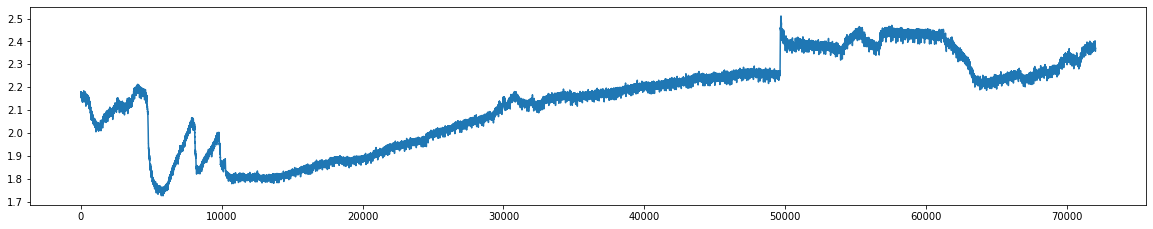

In [ ]:
DATA_PATH = "/content/drive/MyDrive/ACMV1/Stress&Mood/physiorec_pandas_1.pkl"

signal_df_ph1 = pd.read_pickle(DATA_PATH)


display(signal_df_ph1)


signal_df_ph1.rename(columns={'PANAS_1': 'upset', 'PANAS_2': 'hostile','PANAS_3': 'alert', 'PANAS_4': 'ashamed','PANAS_5': 'inspired', 'PANAS_6': 'nervous','PANAS_7': 'determined', 'PANAS_8': 'attentive','PANAS_9': 'afraid', 'PANAS_10': 'active'}, inplace=True)


signal_ppg = np.array(signal_df_ph1['GSR'].iloc[0])


print(len(signal_ppg))

print(signal_ppg)

plotme(signal_ppg)


# print(esm_df['PPGEnd'][esm_df['Participant ID'] == 1001])

# print(signal_df_ph1['EndTime'][signal_df_ph1['Patient'] == 1001])
